# EECS 731 Project 6: Anomaly Detection
## By Matthew Taylor

### Import required modules

In [1]:
# Data manipulation modules
import numpy as np
import pandas as pd

# Visualization modules
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
%matplotlib inline
register_matplotlib_converters()

# Anomaly detection models 
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

### Import dataset

In [2]:
df = pd.read_csv('data/aws_utilization.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.head()

,timestamp,value
0,2014-04-10 00:04:00,91.958
1,2014-04-10 00:09:00,94.798
2,2014-04-10 00:14:00,92.208
3,2014-04-10 00:19:00,93.722
4,2014-04-10 00:24:00,93.042


### Visualize

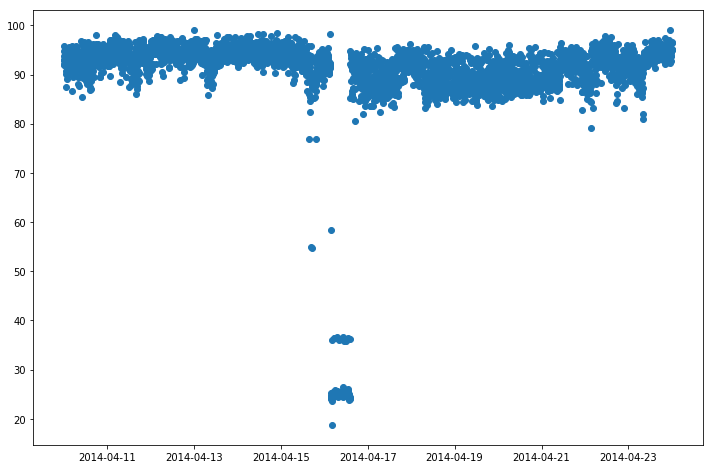

In [3]:
# I decided to use this dataset because of its distinct anomalies
# This will simplify model evaluation and comparisons

plt.rcParams['figure.figsize'] = [12, 8]
plt.plot_date(df.timestamp.values, df.value.values)
plt.show()

### Interquartile Range

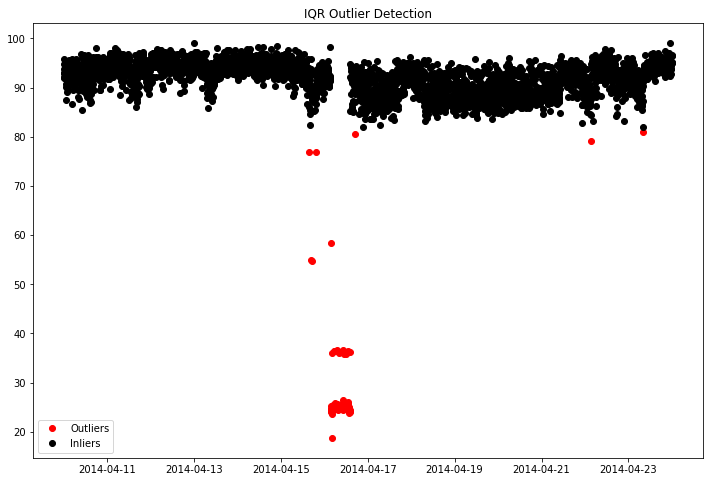

In [4]:
# Calculate IQR
q3, q1 = np.percentile(df.value.values, [75, 25])
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Record inliers and outliers
outlier_times = []
outlier_values = []
inlier_times = []
inlier_values = []

# Classify
for index, row in df.iterrows():
    if row.value < lower_bound or row.value > upper_bound:
        outlier_times.append(row.timestamp)
        outlier_values.append(row.value)
    else:
        inlier_times.append(row.timestamp)
        inlier_values.append(row.value)

# Plot results
plt.rcParams['figure.figsize'] = [12, 8]
plt.title('IQR Outlier Detection')
plt.plot_date(outlier_times, outlier_values, color='red', label='Outliers')
plt.plot_date(inlier_times, inlier_values, color='black', label='Inliers')
plt.legend(loc='best')
plt.show()

### Isolation Forest

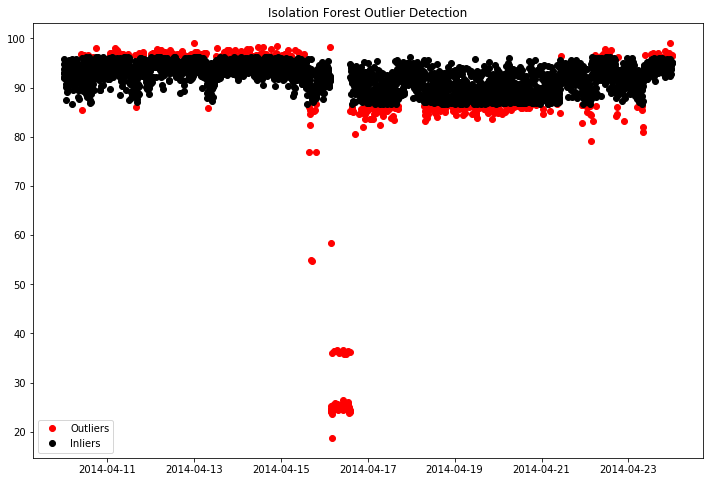

In [5]:
# Train isolation forest
values = np.array(df.value.values).reshape(-1, 1)
if_model = IsolationForest(contamination='auto', behaviour='new', random_state=0).fit(values)

# Calculate inliers and outliers
results = if_model.predict(values)

# Classify points
if_outlier_times = []
if_outlier_values = []
if_inlier_times = []
if_inlier_values = []

for index, row in df.iterrows():
    if results[index] == 1:
        if_inlier_times.append(row.timestamp)
        if_inlier_values.append(row.value)
    else:
        if_outlier_times.append(row.timestamp)
        if_outlier_values.append(row.value)       

# Plot results
plt.rcParams['figure.figsize'] = [12, 8]
plt.title('Isolation Forest Outlier Detection')
plt.plot_date(if_outlier_times, if_outlier_values, color='red', label='Outliers')
plt.plot_date(if_inlier_times, if_inlier_values, color='black', label='Inliers')
plt.legend(loc='best')
plt.show()

### One Class SVM

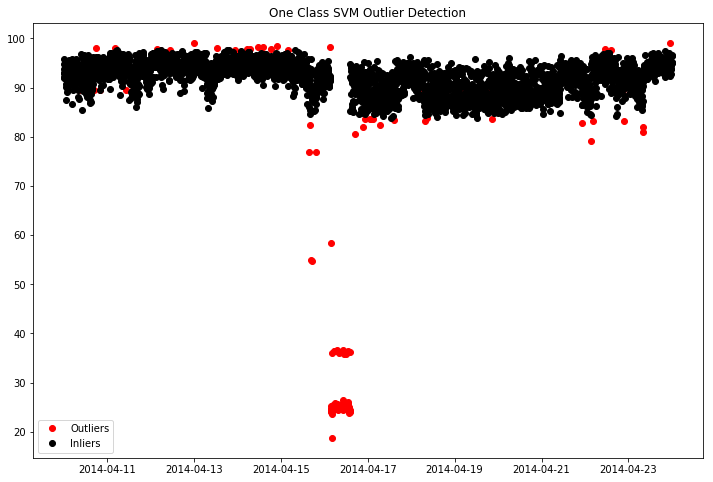

In [6]:
# Train one class svm
all_values = list(df.value.values)
normal_values = np.array(all_values[:1700] + all_values[2000:]).reshape(-1, 1)
svm = OneClassSVM(gamma=.01, nu=.01).fit(normal_values)

# Predict inliers and outliers
results = svm.predict(values)

# Categorize points
svm_outlier_times = []
svm_outlier_values = []
svm_inlier_times = []
svm_inlier_values = []

for index, row in df.iterrows():
    if results[index] == 1:
        svm_inlier_times.append(row.timestamp)
        svm_inlier_values.append(row.value)
    else:
        svm_outlier_times.append(row.timestamp)
        svm_outlier_values.append(row.value)       

# Plot results
plt.rcParams['figure.figsize'] = [12, 8]
plt.title('One Class SVM Outlier Detection')
plt.plot_date(svm_outlier_times, svm_outlier_values, color='red', label='Outliers')
plt.plot_date(svm_inlier_times, svm_inlier_values, color='black', label='Inliers')
plt.legend(loc='best')
plt.show()